In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/CreditCardAnalysis/Datasets/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [46]:
df.shape

(10127, 23)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [48]:
## Categorical Columns Description
df.describe(include = 'object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [49]:
## Numeric Columns Description
df.describe(include = "number")

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Insights
1. **Numeric Data**:
   - The average customer age is approximately 46 years.
   - Most customers have around 2-3 dependents and have been with the bank for an average of 36 months.

2. **Categorical Data**:
   - The majority of customers are existing clients (85% of the dataset).
   - Most customers hold a "Blue" card, with smaller distributions across other card types.

# Dataset Summary: Bank Churners

## Overview
The dataset contains **10,127 rows** and **23 columns**. It provides information about bank customers, including their demographics, financial behaviors, and churn status (whether they stayed or left the bank).

## Key Columns
1. **CLIENTNUM**: Unique client identifier.
2. **Attrition_Flag**: Indicates if the customer is an "Existing Customer" or an "Attrited Customer."
3. **Customer_Age**:        Age of the customer.
4. **Gender**: Gender of the customer (M/F).
5. **Dependent_count**: Number of dependents the customer has.
6. **Education_Level**: Customer's education level.
7. **Marital_Status**: Marital status of the customer.
8. **Income_Category**: Income bracket of the customer.
9. **Card_Category**: Type of card the customer holds.
10. **Credit_Limit**: Credit limit assigned to the customer.
11. **Total_Revolving_Bal**: Customer's total revolving balance.
12. **Avg_Open_To_Buy**: Average credit available to the customer.
13. **Total_Trans_Amt**: Total transaction amount over a period.
14. **Total_Trans_Ct**: Total count of transactions.
15. **Months_on_book**: Number of months the customer has been on the books.
16. **Months_Inactive_12_mon**: Number of inactive months in the last 12 months.

## Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [51]:
## Removing Useless Columns
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], inplace = True)

In [52]:
## Checking null and Duplicates
print(df.isnull().sum())
print("\n"f" Number of Duplicate Values in Data = {df.duplicated().sum()}")

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

 Number of Duplicate Values in Data = 0


In [53]:
## Checking Inconsistency in categorical columns
cat_cols = [i for i in df.select_dtypes(include='object')]
for i in cat_cols:
    counts = df[i].value_counts()
    print("\n"f"Value Counts for {i} column - {counts}")


Value Counts for Attrition_Flag column - Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Value Counts for Gender column - Gender
F    5358
M    4769
Name: count, dtype: int64

Value Counts for Education_Level column - Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Value Counts for Marital_Status column - Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Value Counts for Income_Category column - Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Value Counts for Card_Category column - Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


## No inconsistency in :
* Attrition_Flag
* Gender

## Inconsistency can be seen in:
* Education_level -- unknown unique value
* Marital_Status -- unknowns
* Income_category -- unkowns
* Card_category -- The distribution is highly skewed toward the “Blue” category, which might impact analyses.

In [54]:
df['Education_Level'] = df['Education_Level'].replace({'Unknown': 'Other'})

columns_to_update = ['Marital_Status', 'Income_Category']
for column in columns_to_update:
    df[column] = df[column].replace("Unknown", "Not-Specified")

In [55]:
for i in cat_cols:
    unique = df[i].unique()
    print("\n" f"{i}  - {unique}")


Attrition_Flag  - ['Existing Customer' 'Attrited Customer']

Gender  - ['M' 'F']

Education_Level  - ['High School' 'Graduate' 'Uneducated' 'Other' 'College' 'Post-Graduate'
 'Doctorate']

Marital_Status  - ['Married' 'Single' 'Not-Specified' 'Divorced']

Income_Category  - ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Not-Specified']

Card_Category  - ['Blue' 'Gold' 'Silver' 'Platinum']


In [56]:
## Saving the cleaned data
df.to_csv('/Users/abhishekwaghchaure/Desktop/CreditCardAnalysis/Datasets/CleanedBankChurners.csv')

## EDA

In [57]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Not-Specified,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [78]:
plt.style.use('seaborn-darkgrid')

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [59]:
print("Dataset Summary:")
print(df.info())
print("\n")

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  in

In [60]:
print("Descriptive Statistics for Numeric Columns:")
print(df.describe())
print("\n")

Descriptive Statistics for Numeric Columns:
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000       

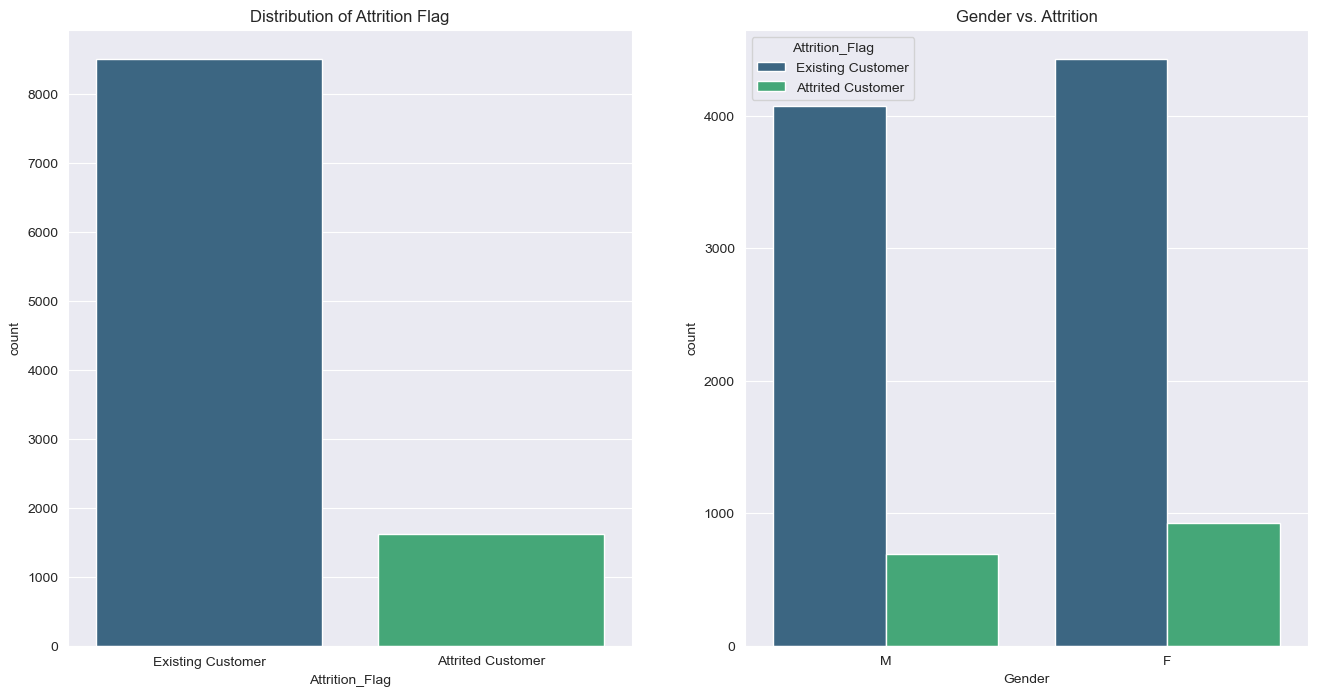

In [66]:
# Distribution of Attrition_Flag
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.countplot(data=df, x="Attrition_Flag", palette="viridis")
plt.title("Distribution of Attrition Flag")

plt.subplot(1,2,2)
sns.countplot(data=df, x="Gender", hue="Attrition_Flag", palette="viridis")
plt.title("Gender vs. Attrition")
plt.show()

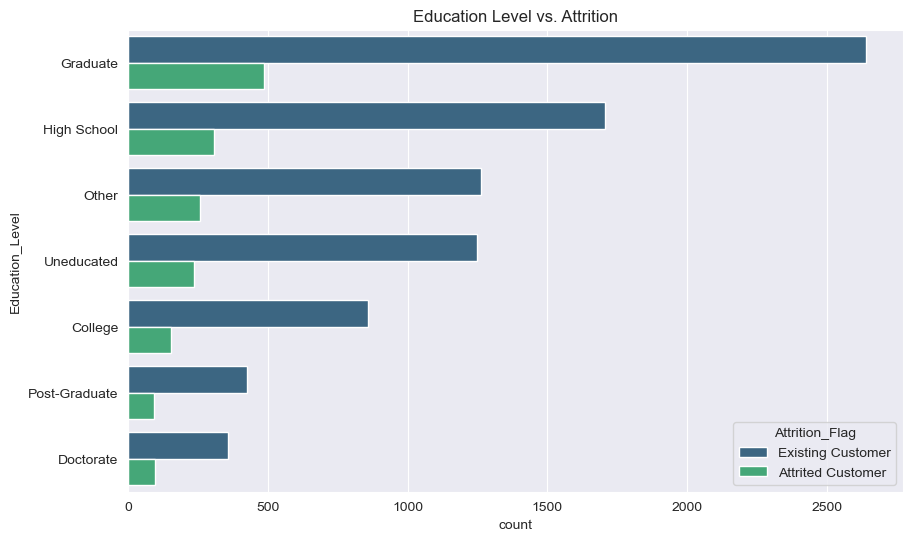

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="Education_Level", hue="Attrition_Flag", palette="viridis", order=df['Education_Level'].value_counts().index)
plt.title("Education Level vs. Attrition")
plt.show()

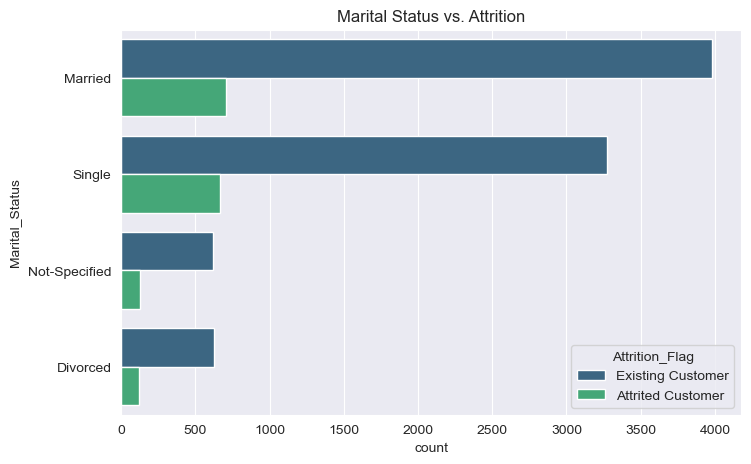

In [69]:
# Marital Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Marital_Status", hue="Attrition_Flag", palette="viridis", order=df['Marital_Status'].value_counts().index)
plt.title("Marital Status vs. Attrition")
plt.show()

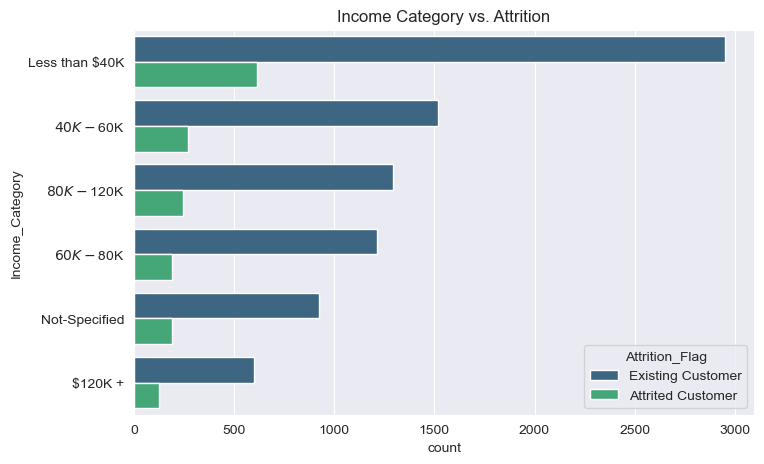

In [70]:
# Income Category Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Income_Category", hue="Attrition_Flag", palette="viridis", order=df['Income_Category'].value_counts().index)
plt.title("Income Category vs. Attrition")
plt.show()

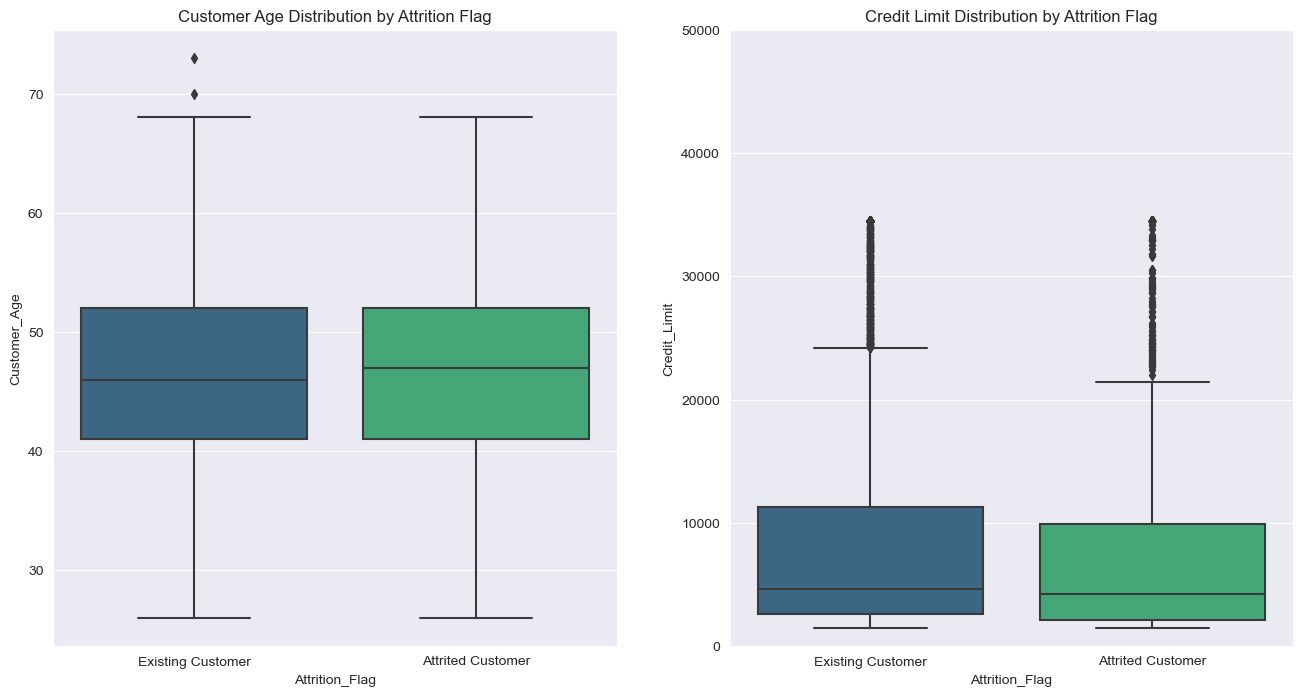

In [74]:
# Boxplot of Age vs. Attrition
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
sns.boxplot(data=df, x="Attrition_Flag", y="Customer_Age", palette="viridis")
plt.title("Customer Age Distribution by Attrition Flag")

plt.subplot(1,2,2)
sns.boxplot(data=df, x="Attrition_Flag", y="Credit_Limit", palette="viridis")
plt.title("Credit Limit Distribution by Attrition Flag")
plt.ylim(0, 50000)  # Cap outliers for better visualization
plt.show()

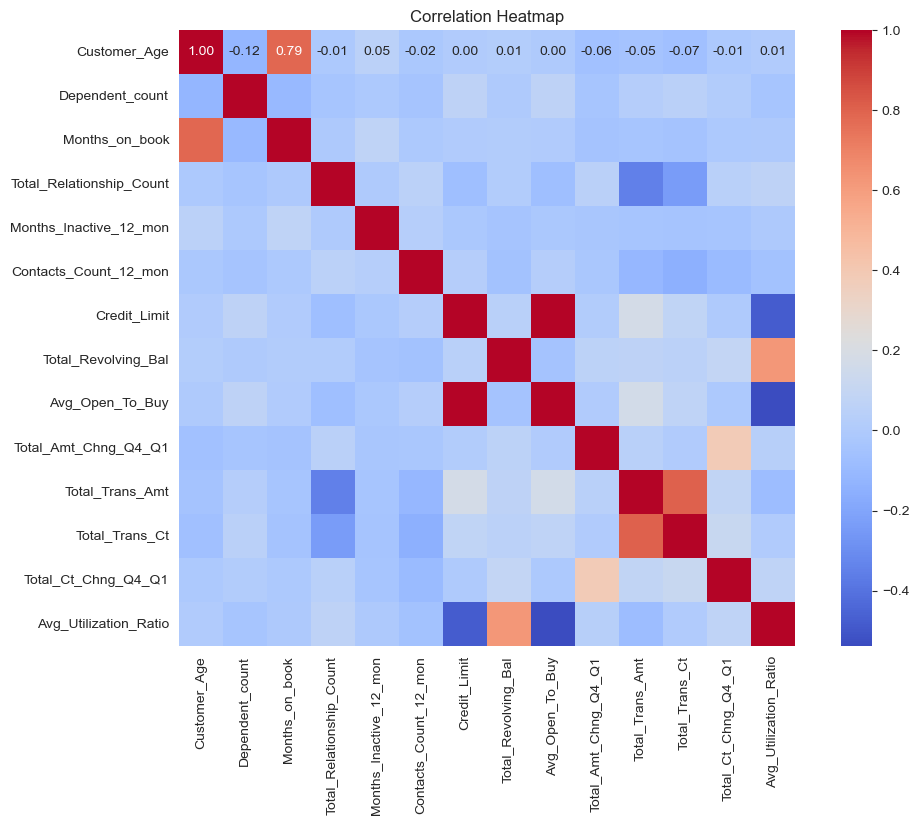

In [76]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(12, 8))
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

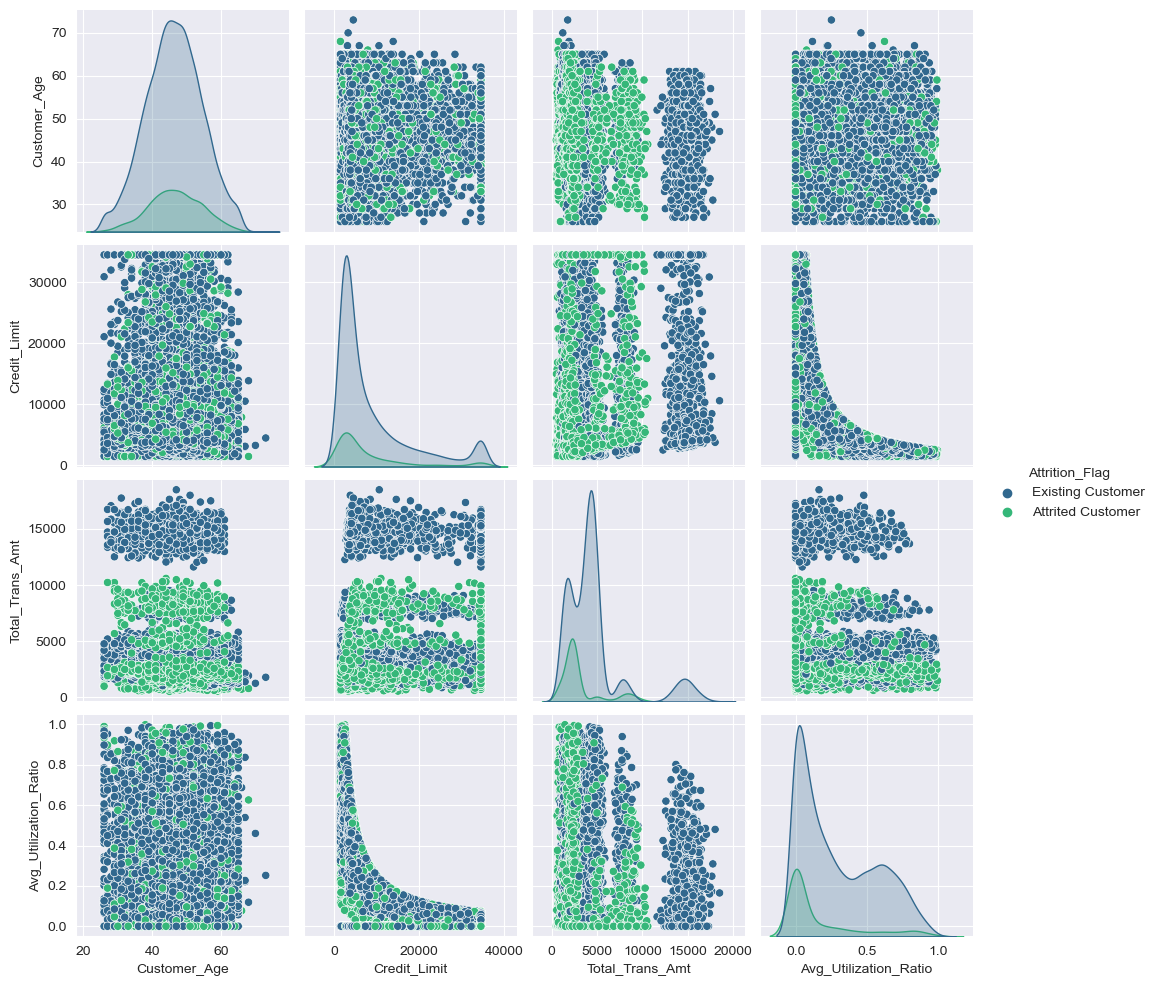

In [79]:
# Pairplot for important numeric columns
important_columns = ["Customer_Age", "Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]
sns.pairplot(df, vars=important_columns, hue="Attrition_Flag", palette="viridis")
plt.show()

In [80]:
# Churn rates by categorical features
for column in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']:
    print(f"Churn Rate by {column}:")
    print(df.groupby(column)['Attrition_Flag'].value_counts(normalize=True))
    print("\n")

Churn Rate by Gender:
Gender  Attrition_Flag   
F       Existing Customer    0.826428
        Attrited Customer    0.173572
M       Existing Customer    0.853848
        Attrited Customer    0.146152
Name: proportion, dtype: float64


Churn Rate by Education_Level:
Education_Level  Attrition_Flag   
College          Existing Customer    0.847976
                 Attrited Customer    0.152024
Doctorate        Existing Customer    0.789357
                 Attrited Customer    0.210643
Graduate         Existing Customer    0.844309
                 Attrited Customer    0.155691
High School      Existing Customer    0.847988
                 Attrited Customer    0.152012
Other            Existing Customer    0.831468
                 Attrited Customer    0.168532
Post-Graduate    Existing Customer    0.821705
                 Attrited Customer    0.178295
Uneducated       Existing Customer    0.840619
                 Attrited Customer    0.159381
Name: proportion, dtype: float64


Churn 

## Attrition Overview
    * The dataset is imbalanced, with more Existing Customers.

## Gender Analysis
    * Attrition rates are slightly higher for Females compared to Males.

## Education Level
    * Attrition is relatively high among customers with lower education levels (e.g., High School, Uneducated).

## Marital Status
    * Married customers form the largest group (47%), followed by Single (39%).
    * Attrition is slightly higher among Single and Divorced customers.

## Income Category
    * Majority of customers earn Less than $40K (35%).
    * Customers in higher income categories (e.g., $120K+) show lower attrition rates.
## Card Category
    * The dataset is heavily skewed toward the Blue card category (93% of customers).
    * Customers with premium cards (Silver, Gold, Platinum) show higher loyalty.

## Customer Age
    * Median customer age is around 46 years.
    * Attrited Customers tend to be slightly older compared to Existing Customers.

## Credit Limit
    * Credit limits range widely, with outliers up to $345,000.
    * Attrited Customers generally have lower credit limits than Existing Customers.

## Correlation Analysis
    * Strong positive correlation between:
        Total_Trans_Ct (Number of Transactions) and Total_Trans_Amt (Transaction Amount).
    * Weak or negligible correlation between most financial metrics and the target variable.

## Utilization Ratio
    * Higher Avg_Utilization_Ratio is associated with higher attrition.
    * Customers with low utilization ratios are more likely to remain loyal.